In [140]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

In [117]:
df = pd.read_csv("train_strokes.csv")

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [119]:
#Dropping id column (it is of no use) 
df.drop("id", axis=1, inplace=True)

In [120]:
df.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [121]:
df = df.dropna()
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

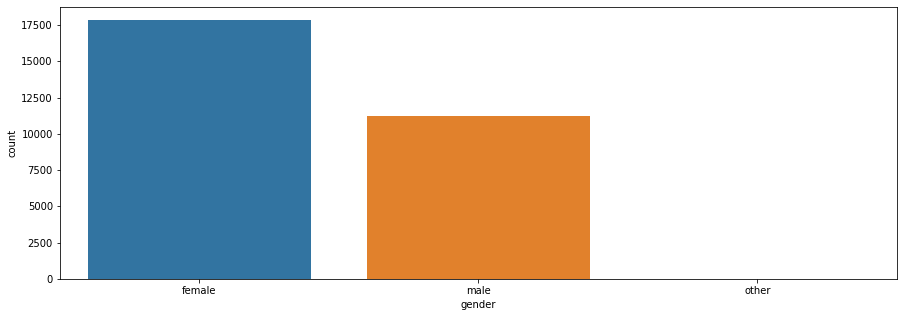

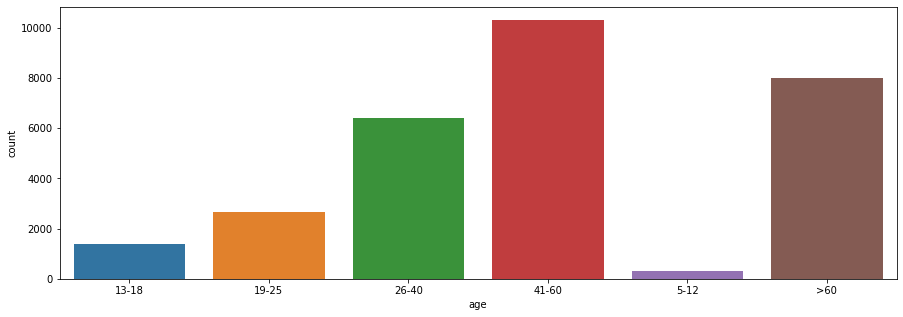

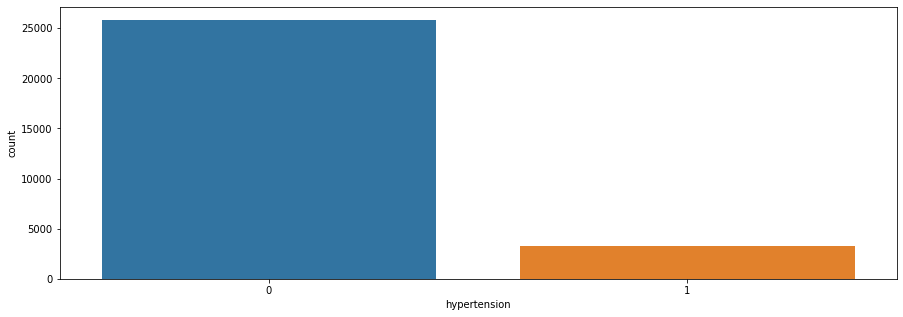

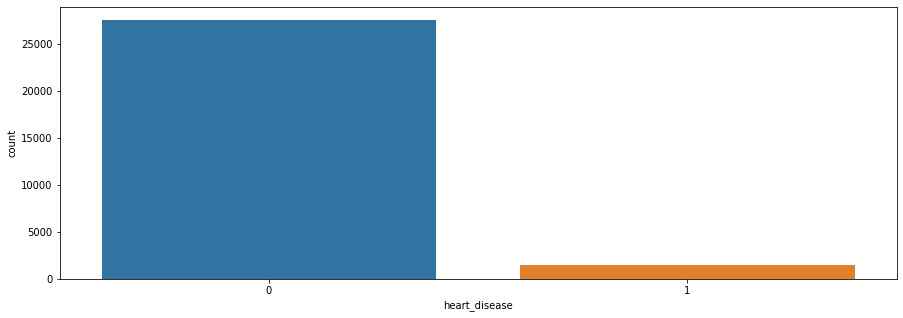

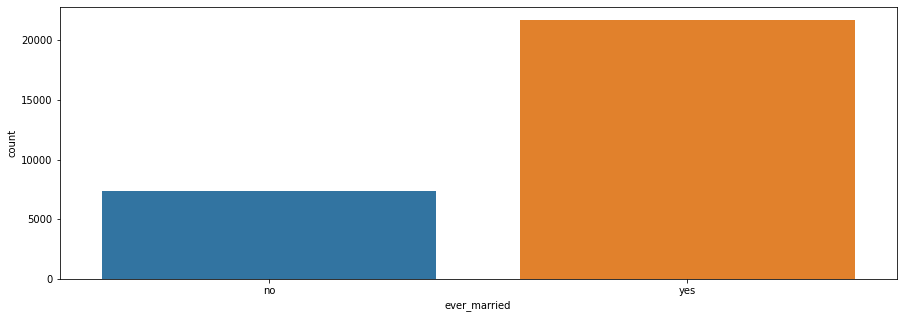

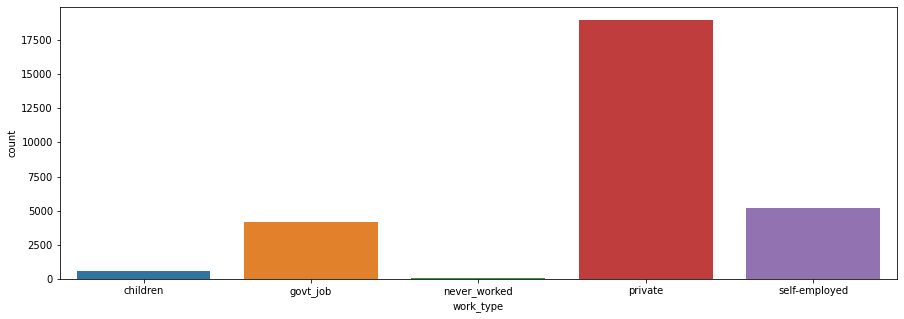

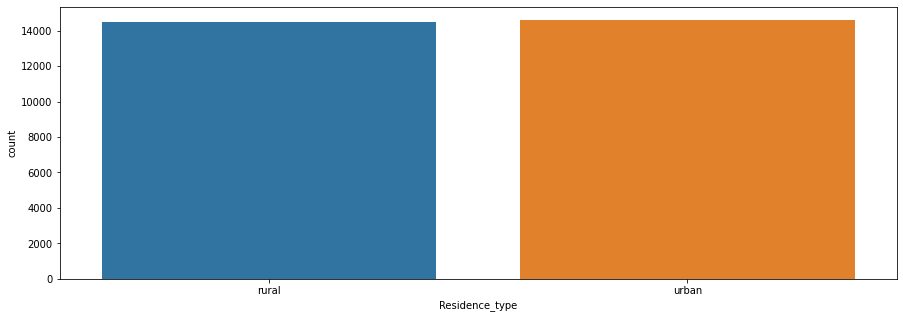

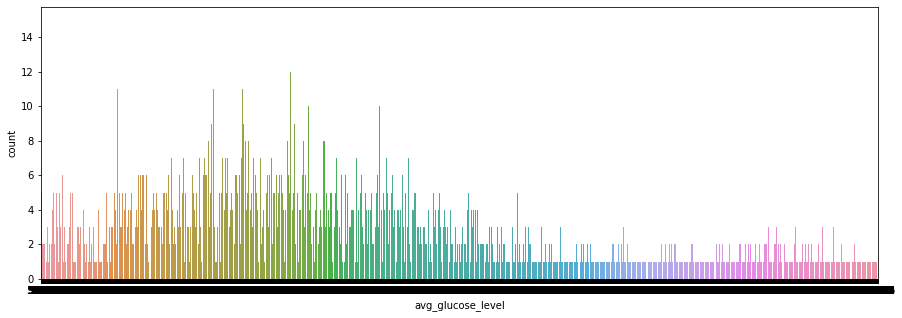

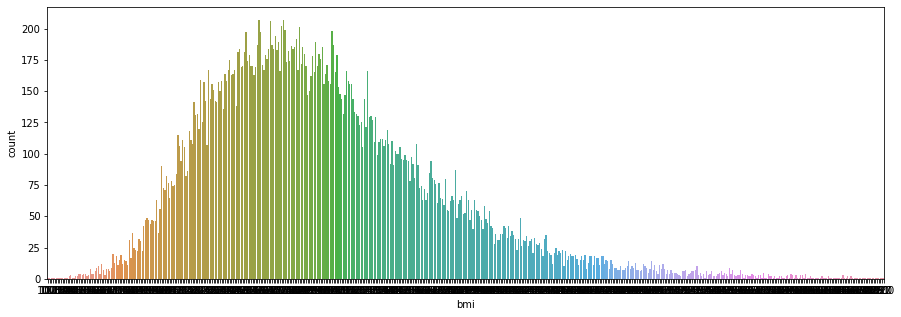

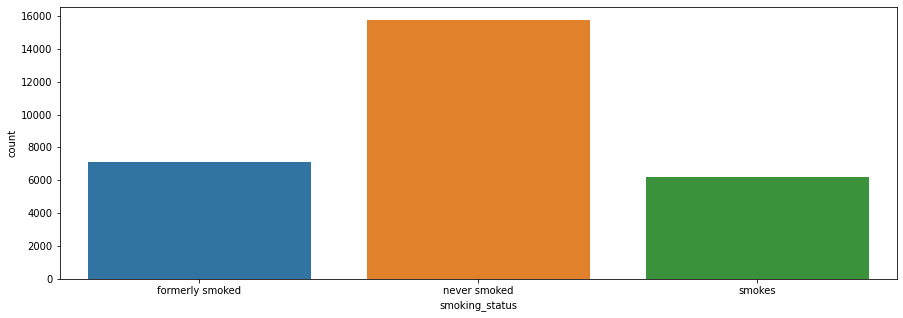

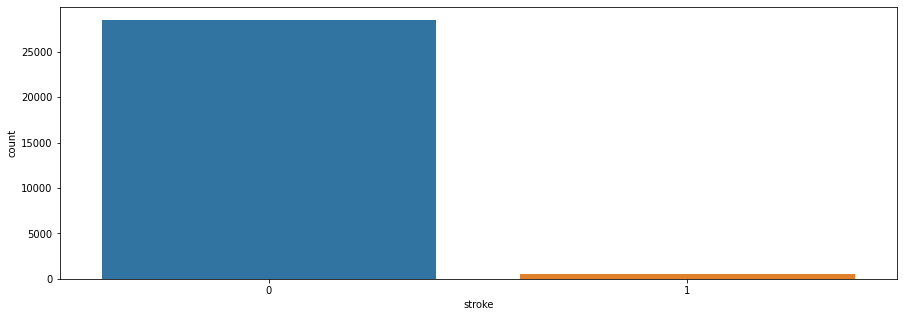

In [87]:
features = df.columns

for i in features:
    plt.figure(figsize=(15,5))
    sns.countplot(x=i, data=df)
    plt.show()

<AxesSubplot:>

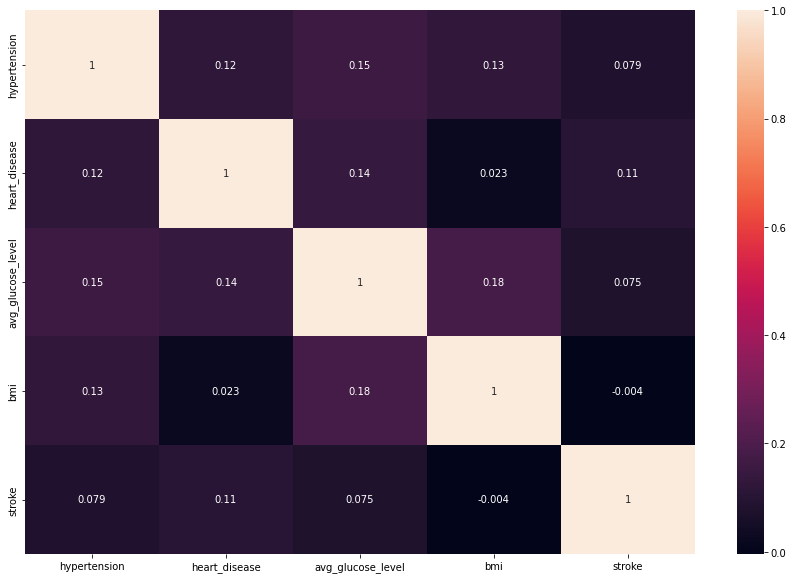

In [88]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [122]:
def group_age(age):
    if age <= 4:
        return 1
    if 5<=age<=12:
        return 2
    if 13<=age<=18:
        return 3
    if 19<=age<=25:
        return 4
    if 26<=age<=40:
        return 5
    if 41<=age<=60:
        return 6
    else:
        return 7

df['age'] = df['age'].apply(group_age)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,6,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,Female,7,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,Female,6,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,Female,7,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,Female,5,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,2,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,6,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,7,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,5,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [123]:
df_obj = df.select_dtypes(include=['object'])
df_obj.describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,29072,29072,29072,29072,29072
unique,3,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,17852,21690,18954,14595,15747


In [124]:
df['gender'].replace(['Female','Male','Other'],[1,2,3],inplace=True)
df['ever_married'].replace(['Yes','No'],[1,0],inplace=True)
df['work_type'].replace(['Private','Self-employed','Govt_job','children','Never_worked'],[1,2,3,4,5],inplace=True)
df['Residence_type'].replace(['Urban','Rural'],[1,0],inplace=True)
df['smoking_status'].replace(['never smoked','formerly smoked','smokes'],[0,1,2],inplace=True)

In [153]:
x=df[df.columns[:-1]]
y=df['stroke']
model_knn = KNeighborsClassifier()
model_svm = SVC()
model_bayes = GaussianNB()
model_tree = DecisionTreeClassifier()
model_regress = LogisticRegression()
model_nn = MLPClassifier()

In [158]:
#Dữ liệu 8-2
accs = []
models=[]
x_train, x_test, y_train, y_test = train_test_split(np.array(x).reshape(np.array(x).shape[0],-1), np.array(y), test_size=0.2, random_state=50)
model_knn.fit(x_train,y_train)
model_svm.fit(x_train,y_train)
model_bayes.fit(x_train,y_train)
model_tree.fit(x_train,y_train)
model_regress.fit(x_train,y_train)
model_nn.fit(x_train,y_train)

accs.append(model_knn.score(x_test, y_test))
accs.append(model_svm.score(x_test, y_test))
accs.append(model_bayes.score(x_test, y_test))
accs.append(model_tree.score(x_test, y_test))
accs.append(model_regress.score(x_test, y_test))
accs.append(model_nn.score(x_test, y_test))

models.append('KNN 8-2')
models.append('SVM 8-2')
models.append('Bayes 8-2')
models.append('Tree 8-2')
models.append('Regression 8-2')
models.append('NN 8-2')

print("Accurency KNN: {}".format(model_knn.score(x_test, y_test)))
print("Accurency SVM: {}".format(model_svm.score(x_test, y_test)))
print("Accurency Bayes: {}".format(model_bayes.score(x_test, y_test)))
print("Accurency Tree: {}".format(model_tree.score(x_test, y_test)))
print("Accurency Regression: {}".format(model_regress.score(x_test, y_test)))
print("Accurency NN: {}".format(model_nn.score(x_test, y_test)))

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accurency KNN: 0.9802235597592434
Accurency SVM: 0.9802235597592434
Accurency Bayes: 0.924505588993981
Accurency Tree: 0.9592433361994841
Accurency Regression: 0.9802235597592434
Accurency NN: 0.9802235597592434


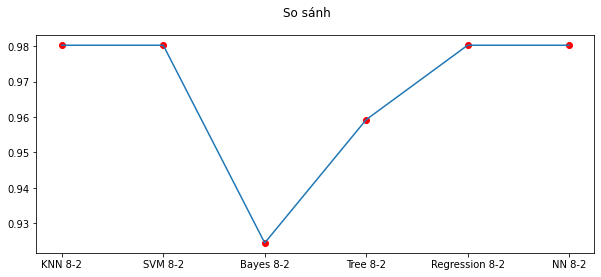

In [159]:
plt.figure(1,figsize=(10,4))
plt.plot(models,accs)
plt.scatter(models,accs,color = 'r')
plt.suptitle('So sánh')
plt.show()

In [160]:
#Dữ liệu 7-3
accs = []
models=[]
x_train, x_test, y_train, y_test = train_test_split(np.array(x).reshape(np.array(x).shape[0],-1), np.array(y), test_size=0.3, random_state=50)
model_knn.fit(x_train,y_train)
model_svm.fit(x_train,y_train)
model_bayes.fit(x_train,y_train)
model_tree.fit(x_train,y_train)
model_regress.fit(x_train,y_train)
model_nn.fit(x_train,y_train)

accs.append(model_knn.score(x_test, y_test))
accs.append(model_svm.score(x_test, y_test))
accs.append(model_bayes.score(x_test, y_test))
accs.append(model_tree.score(x_test, y_test))
accs.append(model_regress.score(x_test, y_test))
accs.append(model_nn.score(x_test, y_test))

models.append('KNN 7-3')
models.append('SVM 7-3')
models.append('Bayes 7-3')
models.append('Tree 7-3')
models.append('Regression 7-3')
models.append('NN 7-3')

print("Accurency KNN: {}".format(model_knn.score(x_test, y_test)))
print("Accurency SVM: {}".format(model_svm.score(x_test, y_test)))
print("Accurency Bayes: {}".format(model_bayes.score(x_test, y_test)))
print("Accurency Tree: {}".format(model_tree.score(x_test, y_test)))
print("Accurency Regression: {}".format(model_regress.score(x_test, y_test)))
print("Accurency NN: {}".format(model_nn.score(x_test, y_test)))

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accurency KNN: 0.9792478789268516
Accurency SVM: 0.9792478789268516
Accurency Bayes: 0.926278376519147
Accurency Tree: 0.9603301994955286
Accurency Regression: 0.9792478789268516
Accurency NN: 0.9792478789268516


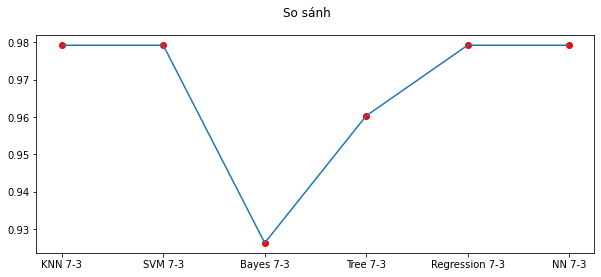

In [161]:
plt.figure(1,figsize=(10,4))
plt.plot(models,accs)
plt.scatter(models,accs,color = 'r')
plt.suptitle('So sánh')
plt.show()

In [162]:
kf = KFold(n_splits=5)
accs = []
models=[]
KhoiTao()

acc_score_knn = []
acc_score_svm = []
acc_score_bayes = []
acc_score_tree = []
acc_score_regress = []
acc_score_nn = []

for train_index, test_index in kf.split(x):
    x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
    # y_train , y_test = y[train_index] , y[test_index]
    
#     model_knn.fit(x_train,y_train)
#     model_svm.fit(x_train,y_train)
#     model_bayes.fit(x_train,y_train)
#     model_tree.fit(x_train,y_train)
#     model_regress.fit(x_train,y_train)
#     model_nn.fit(x_train,y_train)
    
#     acc_score_knn.append(model_knn.score(x_test, y_test))
#     acc_score_svm.append(model_svm.score(x_test, y_test))
#     acc_score_bayes.append(model_bayes.score(x_test, y_test))
#     acc_score_tree.append(model_tree.score(x_test, y_test))
#     acc_score_regress.append(model_regress.score(x_test, y_test))
#     acc_score_nn.append(model_nn.score(x_test, y_test))
    
# print('Accurency KNN of each fold - {}'.format(acc_score_knn))
# print('Avg accuracy KNN: {}'.format(np.array(acc_score_knn).mean()))

# print('Accurency SVM of each fold - {}'.format(acc_score_svm))
# print('Avg accuracy SVM: {}'.format(np.array(acc_score_svm).mean()))
    
# print('Accurency Bayes of each fold - {}'.format(acc_score_bayes))
# print('Avg accuracy Bayes: {}'.format(np.array(acc_score_bayes).mean()))

# print('Accurency Tree decision of each fold - {}'.format(acc_score_tree))
# print('Avg accuracy Tree decision: {}'.format(np.array(acc_score_tree).mean()))
    
# print('Accurency Regression of each fold - {}'.format(acc_score_regress))
# print('Avg accuracy Regression: {}'.format(np.array(acc_score_regress).mean()))

# print('Accurency Neural of each fold - {}'.format(acc_score_nn))
# print('Avg accuracy Neural: {}'.format(np.array(acc_score_nn).mean()))

# accs.append(np.array(acc_score_knn).mean())
# accs.append(np.array(acc_score_knn).mean())
# accs.append(np.array(acc_score_bayes).mean())
# accs.append(np.array(acc_score_tree).mean())
# accs.append(np.array(acc_score_regress).mean())
# accs.append(np.array(acc_score_nn).mean())
# models.append('KNN Kford = 5')
# models.append('SVM Kford = 5')
# models.append('Bayes Kford = 5')
# models.append('Tree Kford = 5')
# models.append('Regression Kford = 5')
# models.append('NN Kford = 5')

In [163]:
import pickle
filename1 = 'model_knn.pkl'
filename2 = 'model_svm.pkl'
filename3 = 'model_bayes.pkl'
filename4 = 'model_tree.pkl'
filename5 = 'model_regress.pkl'
filename6 = 'model_nn.pkl'

#Save model
pickle.dump(model_knn, open(filename1, 'wb'))
pickle.dump(model_svm, open(filename2, 'wb'))
pickle.dump(model_bayes, open(filename3, 'wb'))
pickle.dump(model_tree, open(filename4, 'wb'))
pickle.dump(model_regress, open(filename5, 'wb'))
pickle.dump(model_nn, open(filename6, 'wb'))

#LoadModel
#knn_model_reloaded2 = pickle.load(open(filename, 'rb'))